# Part B
- Binning: equiwidth and equidepth
- Normalisation: MinMaxScaler() and z-score
- Discretisation
- Binarisation

In [26]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

df = pd.read_excel (r"C:\Users\micha\OneDrive - UTS\YEAR 3\35705-Data-Analytics\24632123.xlsx")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,passed days,previous,poutcome,variation rate,price index,Confidence Index,euribor3m,No. employed,Term Deposit,State
0,31,technician,married,professional.course,unknown,yes,no,Fax,4,3,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5017.5,0,ACT
1,57,management,married,university.degree,no,yes,no,Mailing,6,2,...,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5008.7,0,NSW
2,40,management,married,university.degree,no,yes,no,Fax,3,5,...,9,1,success,-1.7,94.215,-40.3,0.896,5191,1,ACT
3,26,blue-collar,single,high.school,no,yes,no,Fax,6,5,...,3,1,success,-3.4,92.649,-30.1,0.714,5176.3,1,NSW
4,30,blue-collar,single,high.school,no,yes,no,Mailing,3,4,...,999,0,nonexistent,1.4,93.918,-42.7,4.968,?,0,ACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,36,admin.,married,university.degree,no,yes,yes,Email,1,3,...,999,0,nonexistent,1.1,93.994,-36.4,4.858,5023.5,0,TAS
2632,30,technician,single,university.degree,unknown,no,no,Cellphone,1,2,...,999,0,nonexistent,1.1,93.994,-36.4,4.856,5023.5,0,NSW
2633,43,admin.,married,university.degree,no,yes,yes,Telephone,3,2,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5176.3,0,TAS
2634,35,admin.,married,high.school,no,yes,yes,Fax,1,1,...,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5076.2,0,TAS


## 2.1 Binning
### 2.1.1 Equiwidth

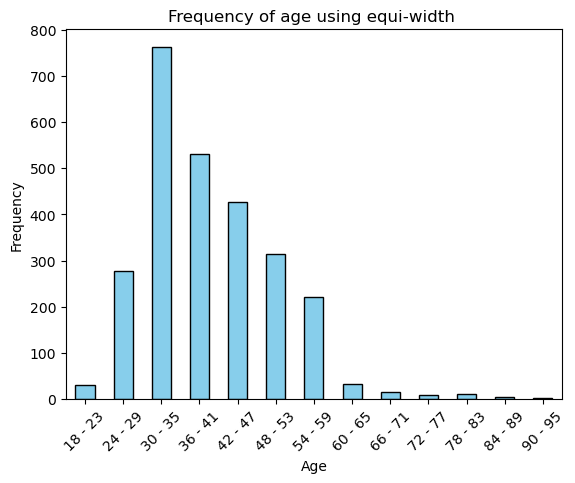

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Apply KBinsDiscretizer
# Set number of bins to 13, encode to orginal to label bin as integers, and strategy to uniform for equiwidth binning
disc = KBinsDiscretizer(n_bins=13, encode='ordinal', strategy='uniform')

# Reshape data to 2D (single column)
data1 = disc.fit_transform(df[['age']])

# Convert the reshaped data result back into a DataFrame
data2 = pd.DataFrame(data1, columns=['age'])

# Create bin_counts variable for the frequency counts for each bin
bin_counts = data2['age'].value_counts().sort_index()

# Create custom labels for the x-axis to label each bin
bin_labels = [
    "18 - 23", "24 - 29", "30 - 35", "36 - 41",
    "42 - 47", "48 - 53", "54 - 59", "60 - 65",
    "66 - 71", "72 - 77", "78 - 83", "84 - 89", "90 - 95"
]

# Plot the bar chart
# Set type of chart to bar, customise bars by colour of sky blue and border of black
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Label title, x and y axis
plt.title('Frequency of age using equi-width ')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Customise xticks with the bin labels
plt.xticks(ticks=range(len(bin_labels)), labels=bin_labels, rotation=45)

# Display result
plt.show()

In [28]:
print(data2.value_counts().sum())

2636


### 2.1.2 Equidepth 

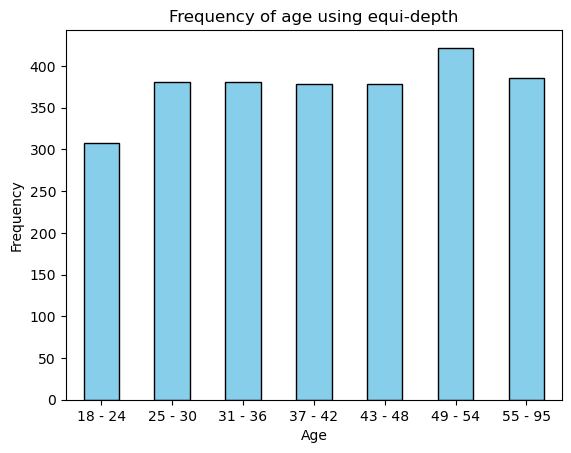

      age
0     1.0
1     6.0
2     4.0
3     0.0
4     1.0
...   ...
2631  3.0
2632  1.0
2633  4.0
2634  2.0
2635  4.0

[2636 rows x 1 columns]
Standard deviation of 7 bins: 248.02


In [35]:
from sklearn.preprocessing import KBinsDiscretizer

# Apply KBinsDiscretizer
# Set number of bins to 7, encode ordinal (assing int value to each bin), set strategy to quantile for equidepth
disc_equidepth = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='quantile')

# Reshape the data to 2D (single column)
data1_equidepth = disc_equidepth.fit_transform(df[['age']]) 

# Convert result after reshaping back into a DataFrame
data2_equidepth = pd.DataFrame(data1_equidepth, columns=['age'])

# Plot bar chart
# Count the frequency of each bin
bin_counts_equidepth = data2_equidepth['age'].value_counts().sort_index()

# Plot the bar chart
bin_counts_equidepth.plot(kind='bar', color='skyblue', edgecolor='black')

# # Label the bins, title, x and y axis
bin_labels_equidepth = [ "18 - 24", "25 - 30", "31 - 36", "37 - 42", 
               "43 - 48", "49 - 54", "55 - 95"]
plt.title('Frequency of age using equi-depth')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Customise xticks with the bin labels
plt.xticks(ticks=range(len(bin_labels_equidepth)), labels=bin_labels_equidepth, rotation=0) 

# Display binned result
plt.show()

print(data2_equidepth)
std_dev = bin_counts_equidepth.std()
print(f"Standard deviation of 7 bins: {std_dev:.2f}")

## 2.2 Normalisation
### MinMaxScalar()

In [30]:
from sklearn.preprocessing import MinMaxScaler

# normalise data between 0 - 1 by default
min_max = MinMaxScaler()

# MinMaxScalar() expects a 2D array, so the data needs to be reshaped
# fit_transform computes the min and max and then scales the data to 0 - 1
passed_days_data = min_max.fit_transform(df[['passed days']])

# This line converts the 2D array to dataframe
# it takes in the parameters- passed_data_data which is the normalised data of passed days
#                           - columns specifies that the dataset has column passed days
normalised_data = pd.DataFrame(passed_days_data,columns=['passed days'])

# display normalised data set
print(normalised_data)

      passed days
0        1.000000
1        1.000000
2        0.007021
3        0.001003
4        1.000000
...           ...
2631     1.000000
2632     1.000000
2633     1.000000
2634     1.000000
2635     1.000000

[2636 rows x 1 columns]


### Z-score

In [31]:
from sklearn.preprocessing import StandardScaler

# normalise data for z-score normalisation around mean = 0, standard deviation = 1
std_scaler_z = StandardScaler()

# calculate the mean and standard deviation, then transforms the data
# to z-score, z=(x-μ)/σ
passed_days_data_z = std_scaler_z.fit_transform(df[['passed days']])

# convert back to a dataframe
dataset_z = pd.DataFrame(passed_days_data_z,columns=['passed days'])

# display result
print(dataset_z)

# summarise result
dataset_z.describe()


      passed days
0        0.194409
1        0.194409
2       -5.126715
3       -5.158964
4        0.194409
...           ...
2631     0.194409
2632     0.194409
2633     0.194409
2634     0.194409
2635     0.194409

[2636 rows x 1 columns]


,passed days
count,2.636000e+03
mean,-2.506847e-16
std,1.000190e+00
min,-5.164339e+00
25%,1.944089e-01
50%,1.944089e-01
75%,1.944089e-01
max,1.944089e-01


### Binarisation of 'contact'

In [32]:
from sklearn.preprocessing import OneHotEncoder

# instantiate OneHotEncoder
oneHot = OneHotEncoder(dtype=int, sparse_output=False)

# apply one-hot encoding technique on the 'contact' variable
contact = oneHot.fit_transform(df[['contact']])

# take the categories (feature names) of 'contact'
contact_categories = oneHot.get_feature_names_out(['contact'])

# create a new DataFrame with the one-hot encoded data with contact and assigns each category as a separate labelled column
contact_encoded = pd.DataFrame(contact, columns=contact_categories)

# display one-hot encoded data
print(contact_encoded)

print(contact_encoded.shape)
print(contact_encoded.sum())

      contact_Cellphone  contact_Email  contact_Fax  contact_Mailing  \
0                     0              0            1                0   
1                     0              0            0                1   
2                     0              0            1                0   
3                     0              0            1                0   
4                     0              0            0                1   
...                 ...            ...          ...              ...   
2631                  0              1            0                0   
2632                  1              0            0                0   
2633                  0              0            0                0   
2634                  0              0            1                0   
2635                  0              0            0                0   

      contact_Telephone  
0                     0  
1                     0  
2                     0  
3                     0  
4    

### Discretisation

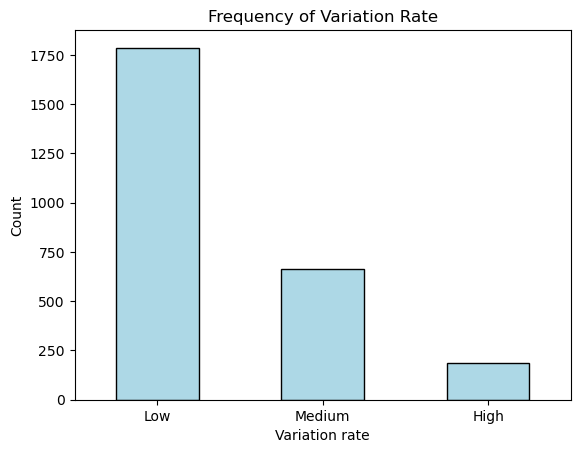

count
1786    1
662     1
188     1
Name: count, dtype: int64


2636

In [33]:
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd
import matplotlib.pyplot as plt

# use KBinsDiscretizer to transform numeric data into categorical bins
# parameters: number of bins = 3, encode bins = to numerica values, strategy = bins to equal-width
disc_vr = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

# reshape the data to 2D (single column)
data1_vr = disc_vr.fit_transform(df[['variation rate']]) 

# convert the result back into a DataFrame using pandas
data2_vr = pd.DataFrame(data1_vr, columns=['variation rate'])

# create a variable to store the x axis labels for the bins
bin_labels_vr = ['Low', 'Medium', 'High']

# get frequency distribution of distinct values form the variation rate columnD
bin_counts_vr = data2_vr['variation rate'].value_counts()


# plot the bar chart
# parameters- kind = type of char, color = of customisation, edgSecolor = of customisation)
bin_counts_vr.plot(kind='bar', color='lightblue', edgecolor='black')

# labelling
plt.title('Frequency of Variation Rate')
plt.xlabel('Variation rate')
plt.ylabel('Count')
plt.xticks(ticks=range(3), labels=bin_labels_vr, rotation =0) 

# display result
plt.show()

# display frequency of bins
print(bin_counts_vr.value_counts())
bin_counts_vr.sum()